# Non-negative Matrix Multipliaction

minimize $||V-WH||^2$ where s.t W, H > 0 and $V = WH$

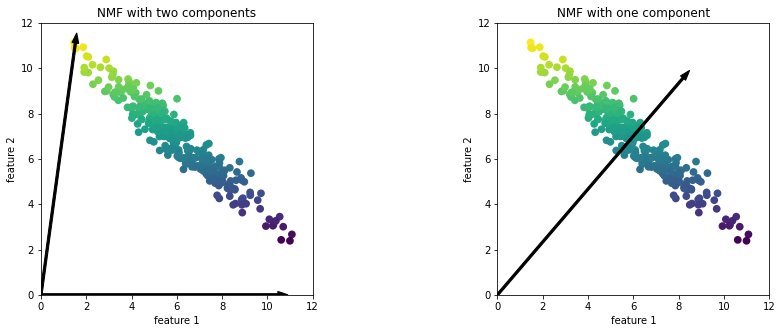

In [3]:
# all data points on the right can be written
# from two combination from left 
import mglearn
mglearn.plots.plot_nmf_illustration()

Text(0, 0.5, 'signal')

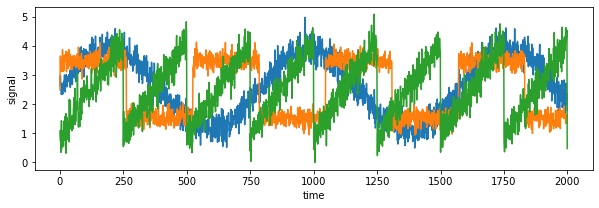

In [5]:
# using NMF to recover signals
import matplotlib.pyplot as plt

signal = mglearn.datasets.make_signals()
plt.figure(figsize=(10,3))
plt.plot(signal, '-')
plt.xlabel("time")
plt.ylabel("signal")

In [7]:
# mix data into a 100-dimensional size
import numpy as np

A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(signal, A.T)
print("shape of measurements {}".format(X.shape))

shape of measurements (2000, 100)


In [8]:
# use NMF to recover the three signals
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42)
nmf_recovered = nmf.fit_transform(X)
print("recovered signal shape {}".format(nmf_recovered.shape))

recovered signal shape (2000, 3)


In [9]:
# use PCA as comparison
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
pca_recovered = pca.fit_transform(X)
print("recovered signal shape {}".format(pca_recovered.shape))

recovered signal shape (2000, 3)


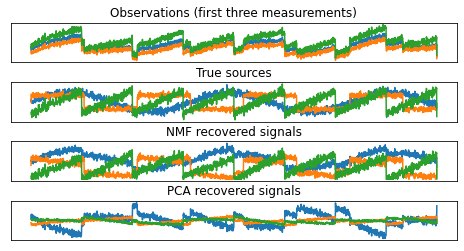

In [10]:
models = [X, signal, nmf_recovered, pca_recovered]
names = ['Observations (first three measurements)',
'True sources',
'NMF recovered signals',
'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')